In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [16]:
# GitHub에서 데이터 로드
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
df = pd.read_csv(url)
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
# 결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [18]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [19]:
# 통계 정보 확인
df.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [20]:
# 성별(Sex) 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
df.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


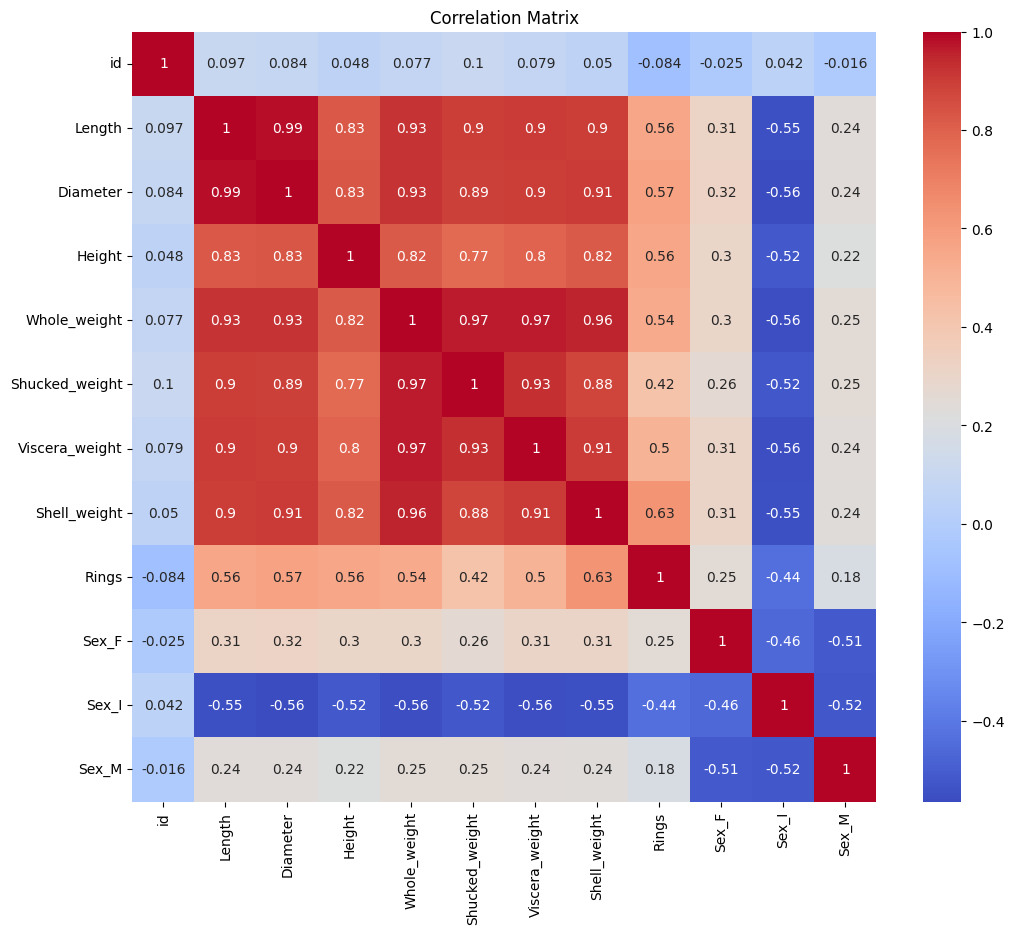

In [21]:
# 상관관계 분석
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

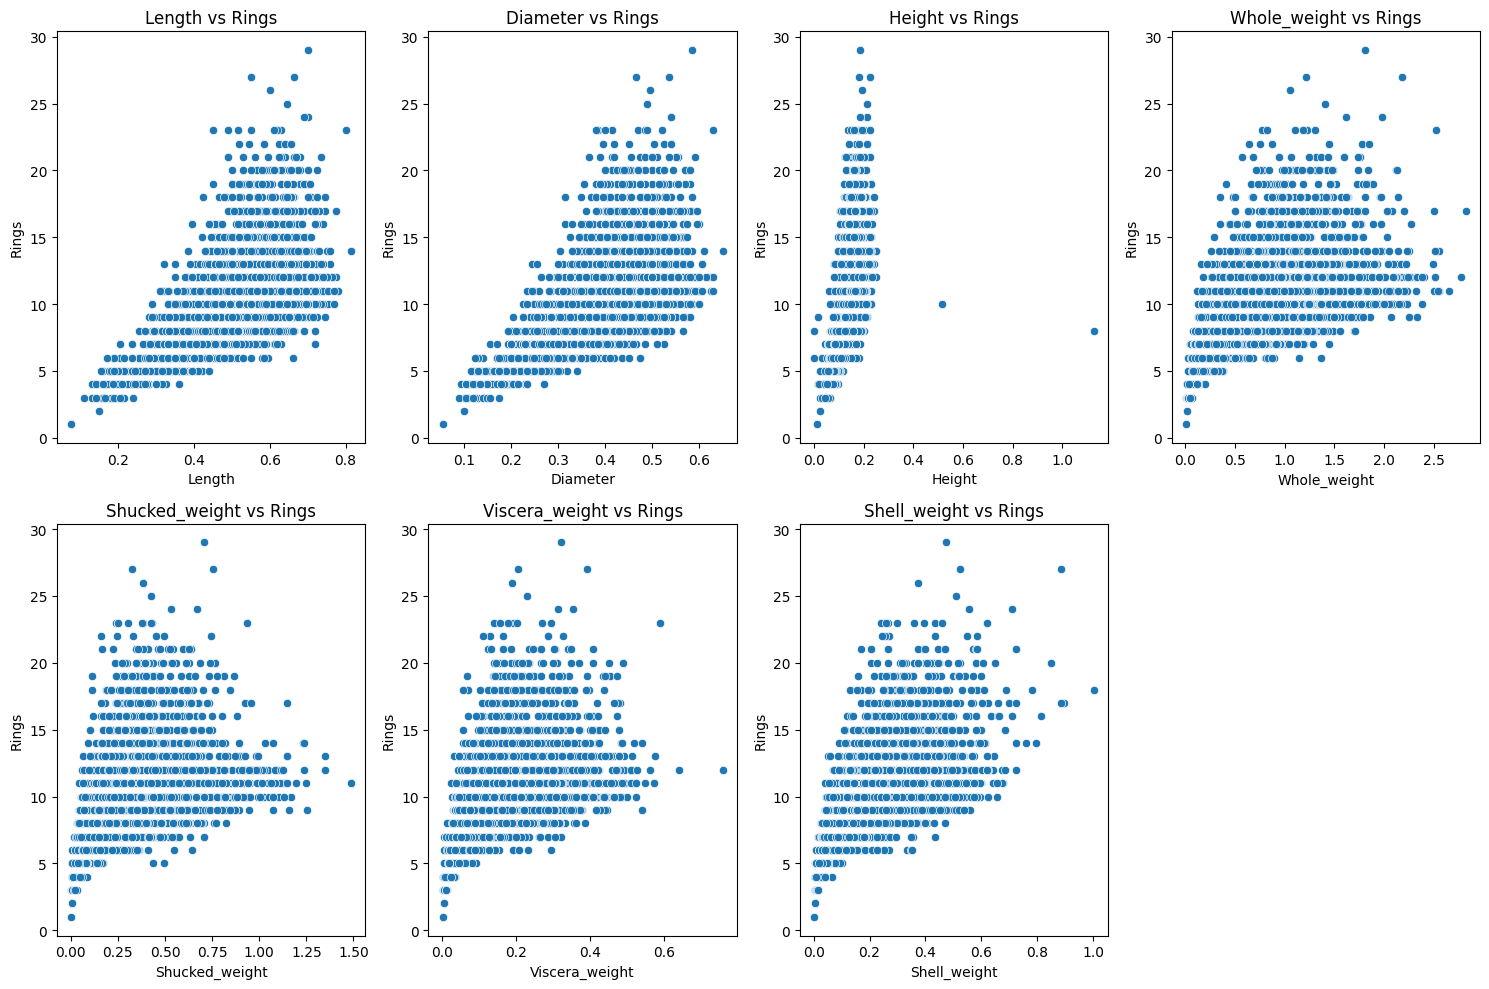

In [22]:
# 타겟 변수(Rings)와 다른 변수들의 관계 시각화
features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=feature, y='Rings', data=df)
    plt.title(f'{feature} vs Rings')

plt.tight_layout()
plt.show()

In [23]:
# 데이터와 타겟 분리
X = df.drop('Rings', axis=1).values
y = df['Rings'].values

In [24]:
# 훈련 및 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 데이터 형태 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 11), (836, 11), (3341,), (836,))

In [26]:
# 모델 구축
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))  # 회귀 문제이므로 활성화 함수 없음
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# First, let's check the data types of your training and test data
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)
print("X_test dtype:", X_test.dtype)
print("y_test dtype:", y_test.dtype)

# Convert the data to float32, which is what TensorFlow expects
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Now try training the model again
history = model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

X_train dtype: float32
y_train dtype: float32
X_test dtype: float32
y_test dtype: float32


NameError: name 'X_train_scaled' is not defined

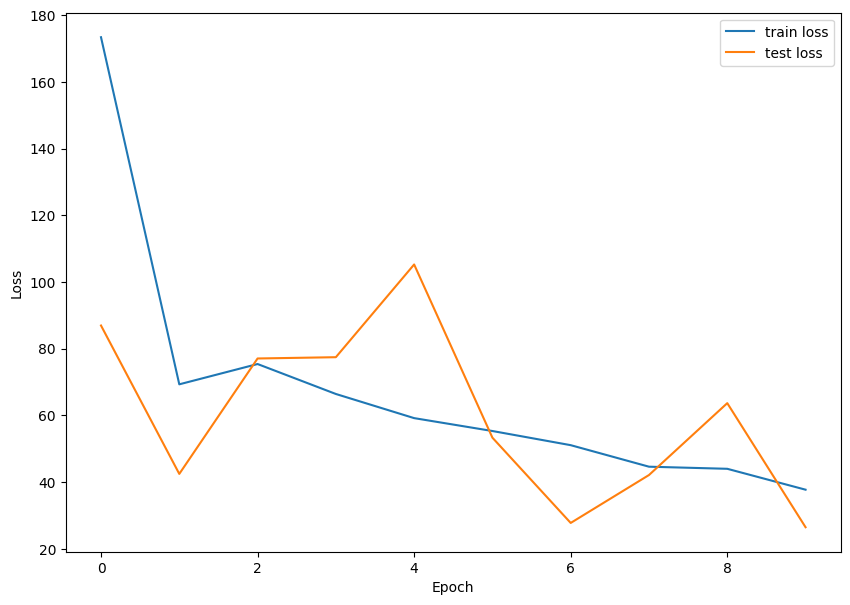

In [28]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
# 모델 평가
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 4ms/step - loss: 26.4390 - mse: 26.4390


[26.439041137695312, 26.439041137695312]